Book: Times Series Analysis for Everyone

Author: Bruno Gonçalves

Published by Pearson

https://learning.oreilly.com/videos/times-series-analysis

Github: https://github.com/DataForScience/Timeseries

# Chapter 1 - Pandas

In [1]:
!pip install watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import watermark

%load_ext watermark
%matplotlib inline

In [3]:
plt.style.use('seaborn-v0_8-muted')

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.58+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

numpy     : 1.25.2
watermark : 2.4.3
pandas    : 2.0.3
matplotlib: 3.7.1



### Recap

In [ ]:
data = {'id': [1, 2, 3, 4, 5],
        'names': ['Ana', 'Karen', 'Bia', 'Joao', 'Pedro']}
series = pd.Series(data['names'])
series

0      Ana
1    Karen
2      Bia
3     Joao
4    Pedro
dtype: object

In [ ]:
df = pd.DataFrame(data)
df.columns=['Id', 'Name']
df = pd.concat([df, pd.DataFrame([{'Id': 6, 'Name': 'Lais'}])], ignore_index=True)
df.index = ['row1', 'row2', 'row3', 'row4', 'row5', 'row6']
df['Age'] = [15, 18, 17, 25, 30, 24]
df['Gender'] = [0, 0, 0, 1, 1, 0]

df

,Id,Name,Age,Gender
row1,1,Ana,15,0
row2,2,Karen,18,0
row3,3,Bia,17,0
row4,4,Joao,25,1
row5,5,Pedro,30,1
row6,6,Lais,24,0


In [ ]:
# search by index names
df.loc[['row2','row3'], ['Name']] #df.loc[['b','c']].Names

,Name
row2,Karen
row3,Bia


In [ ]:
# search by index position
df.iloc[1:3, [1]] # df.iloc[1:3].Names

,Names
row2,Karen
row3,Bia


In [ ]:
# map works at element level and accepts functions and dicts.
# Series.map(arg, na_action=None) -> Series
# na_action  lets you decide what happens to NaN values
df['Age'] = df['Age'].map(lambda x: x+1)
df

,Id,Name,Age
row1,1,Ana,18
row2,2,Karen,21
row3,3,Bia,20
row4,4,Joao,28
row5,5,Pedro,33
row6,6,Lais,27


In [ ]:
GENDER_ENCODING = {
    0: 'female',
    1: 'male'
}

df['GenderDescription'] = df['Gender'].map(GENDER_ENCODING)
df

,Id,Name,Age,Gender,GenderDescription
row1,1,Ana,15,0,female
row2,2,Karen,18,0,female
row3,3,Bia,17,0,female
row4,4,Joao,25,1,male
row5,5,Pedro,30,1,male
row6,6,Lais,24,0,female


In [ ]:
# apply accepts a function. It does not accept a dict. So to do the same as before is necessary to get first each element from the dict. Map is faster than apply for this.
df['GenderWithApply'] = df['Gender'].apply(lambda x:
    GENDER_ENCODING.get(x, np.nan)
)
df

,Id,Name,Age,Gender,GenderDescription,GenderWithApply
row1,1,Ana,15,0,female,female
row2,2,Karen,18,0,female,female
row3,3,Bia,17,0,female,female
row4,4,Joao,25,1,male,male
row5,5,Pedro,30,1,male,male
row6,6,Lais,24,0,female,female


In [ ]:
# it is possible to perform aggregations, but it does not keep the indexes
df.groupby("Gender")["Age"] \
    .apply(
        lambda x: (x - x.mean()) / x.std()
    )

Gender      
0       row1   -0.903696
        row2   -0.129099
        row3   -0.387298
        row6    1.420094
1       row4   -0.707107
        row5    0.707107
Name: Age, dtype: float64

In [ ]:
df.groupby("Gender")["Age"] \
    .apply(
        'mean'
    )

Gender
0    18.5
1    27.5
Name: Age, dtype: float64

In [ ]:
df["Age"].apply('mean')

21.5

In [ ]:
# transform works at the column level. Takes one function that is expected to be applied to a column and return a column of equal size.
# Supports aggregations
# Retains input dataFrame indexes
# It return a dataframe with the same length along the axis it's applied on. It means that it assigns those aggregate values to each element.
df['Age'] = df['Age'].transform(lambda x: x+1)
df

,Id,Name,Age
row1,1,Ana,17
row2,2,Karen,20
row3,3,Bia,19
row4,4,Joao,27
row5,5,Pedro,32
row6,6,Lais,26


In [ ]:
df.groupby("Gender")["Age"] \
    .transform(
        lambda x: (x - x.mean()) / x.std()
    )

row1   -0.903696
row2   -0.129099
row3   -0.387298
row4   -0.707107
row5    0.707107
row6    1.420094
Name: Age, dtype: float64

In [ ]:
df.groupby("Gender")["Age"] \
    .transform(
        'mean'
    )

row1    18.5
row2    18.5
row3    18.5
row4    27.5
row5    27.5
row6    18.5
Name: Age, dtype: float64

### Timeseries example
https://finance.yahoo.com/quote/AAPL/history

In [ ]:
df_yahoo = pd.read_csv('/content/AAPL.csv', parse_dates=['Date'])
# alternative: df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date']).astype('str')
df_yahoo.set_index('Date', inplace=True)
df_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500
2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200
2023-04-18,166.100006,167.410004,165.649994,166.470001,165.586166,49923000
2023-04-19,165.800003,168.160004,165.539993,167.630005,166.740005,47720200
2023-04-20,166.089996,167.869995,165.559998,166.649994,165.765198,52456400


In [ ]:
df_yahoo.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300
2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300
2024-04-12,174.259995,178.360001,174.210007,176.550003,176.550003,101593300


In [ ]:
df_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-14 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
df_yahoo.loc['2023':'2023-05-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500
2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200
2023-04-18,166.100006,167.410004,165.649994,166.470001,165.586166,49923000
2023-04-19,165.800003,168.160004,165.539993,167.630005,166.740005,47720200
2023-04-20,166.089996,167.869995,165.559998,166.649994,165.765198,52456400
2023-04-21,165.050003,166.449997,164.490005,165.020004,164.143860,58337300
2023-04-24,165.000000,165.600006,163.889999,165.330002,164.452209,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,162.900482,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,162.890533,45498800


In [ ]:
df_yahoo['Year'] = df_yahoo.index.year
df_yahoo['Month'] = df_yahoo.index.month
df_yahoo

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500,2023,4
2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200,2023,4
2023-04-18,166.100006,167.410004,165.649994,166.470001,165.586166,49923000,2023,4
2023-04-19,165.800003,168.160004,165.539993,167.630005,166.740005,47720200,2023,4
2023-04-20,166.089996,167.869995,165.559998,166.649994,165.765198,52456400,2023,4
...,...,...,...,...,...,...,...,...
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500,2024,4
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200,2024,4
2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300,2024,4


In [ ]:
df_yahoo[['Volume', 'Year']].groupby('Year').sum()

,Volume
Year,
2023,10119043100
2024,4342900000


In [ ]:
df_yahoo_pivotted = pd.pivot_table(
    df_yahoo,
    index='Month',
    columns='Year',
    values='Open',
    aggfunc=np.mean
)
df_yahoo_pivotted

Year,2023,2024
Month,,
1,NaN,187.597142
2,NaN,184.668000
3,NaN,172.789000
4,165.422728,169.806998
5,172.510456,NaN
6,183.679048,NaN
7,192.506500,NaN
8,181.415219,NaN
9,177.586500,NaN


<Axes: xlabel='Month'>

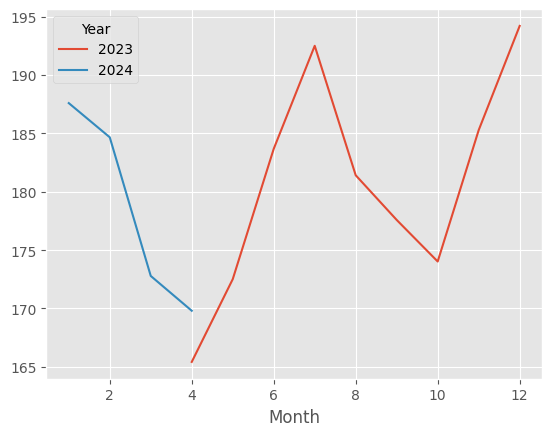

In [ ]:
df_yahoo_pivotted.plot()

# Chapter 2 - Timeseries Visualization

### GDP

Data: https://github.com/DataFhttps://github.com/DataForScience/Timeseries/blob/master/data/GDP.csv

In [ ]:
gdp_df = pd.read_csv('/content/GDP.csv', parse_dates=['DATE'])
gdp_df.set_index(['DATE'], inplace=True)
gdp_df

,GDP
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017
...,...
2018-04-01,18598.135
2018-07-01,18732.720
2018-10-01,18783.548


In [ ]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1947-01-01 to 2019-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     290 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


Text(0, 0.5, 'GDP ($\\$B$)')

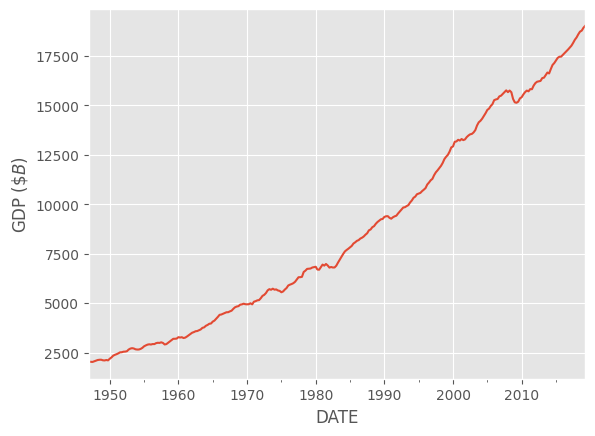

In [ ]:
ax = gdp_df.plot(legend=False)
ax.set_ylabel(r'GDP ($\$B$)')

### Influenza mortality

https://github.com/DataForScience/Timeseries/blob/master/data/CDC.csv

In [ ]:
cdc_df = pd.read_csv('/content/CDC.csv')
cdc_df

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9
...,...,...,...,...,...,...,...,...
398,2019,34,5.085333,5.24916,5.58794,46172,2343,5
399,2019,35,5.031743,5.26200,5.60078,44577,2231,12
400,2019,36,4.951483,5.28715,5.62593,43078,2122,11
401,2019,37,4.781635,5.32427,5.66305,38857,1845,13


<Axes: >

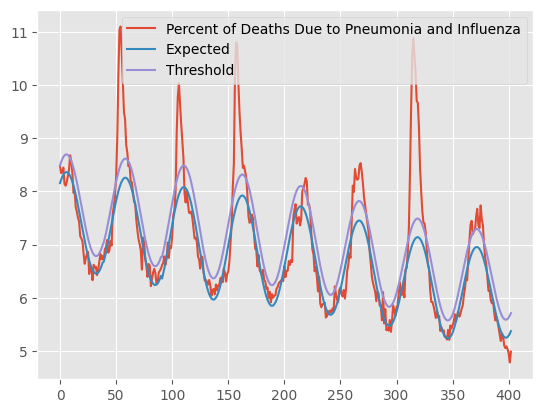

In [ ]:
cdc_df[['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold']].plot()

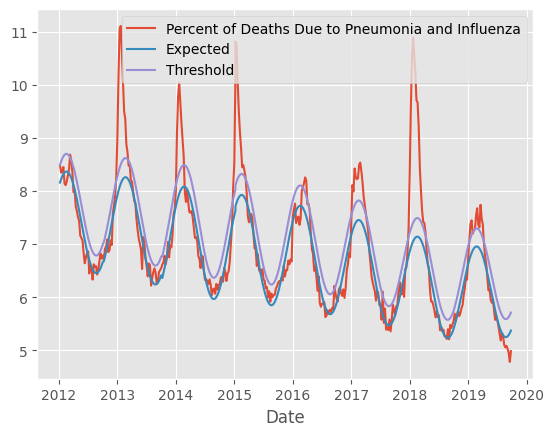

In [ ]:
cdc_df['Date'] = cdc_df['Year'] + cdc_df['Week'] /52 # 52 is the number of weeks of a year
ax = cdc_df.plot(x='Date', y=['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold'])
ax.legend = ['Mortality', 'Expected', 'Threshold']
ax.set_xlabel = 'Date'
ax.set_xlabel = 'Mortality'

In [ ]:
cdc_df.head()

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths,Date
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10,2012.019231
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7,2012.038462
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9,2012.057692
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11,2012.076923
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9,2012.096154


### Sun activity

https://github.com/DataForScience/Timeseries/blob/master/data/sun.csv

In [ ]:
sun_df = pd.read_csv('/content/sun.csv')
sun_df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


Text(0, 0.5, 'Sun Spot Activity')

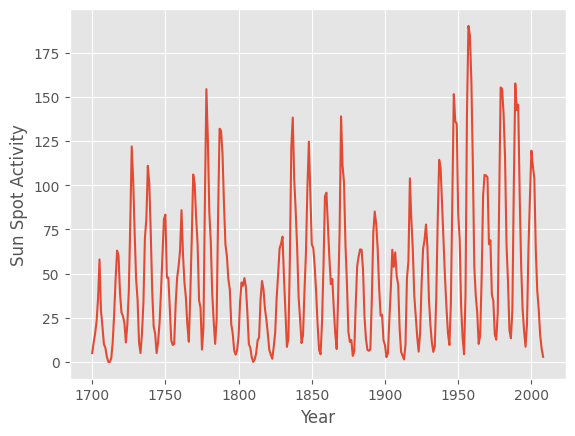

In [ ]:
ax = sun_df.plot(x='YEAR', y='SUNACTIVITY', legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('Sun Spot Activity')

### Stock Market

https://github.com/DataForScience/Timeseries/blob/master/data/DJIA.csv

In [ ]:
dj_df = pd.read_csv('/content/DJIA.csv',
                    parse_dates=['DATE'],
                    na_values='.'# replaces dots with nan
                    )
dj_df.set_index('DATE', inplace=True)
dj_df

,DJIA
DATE,
2009-10-12,9885.80
2009-10-13,9871.06
2009-10-14,10015.86
2009-10-15,10062.94
2009-10-16,9995.91
...,...
2019-10-04,26573.72
2019-10-07,26478.02
2019-10-08,26164.04


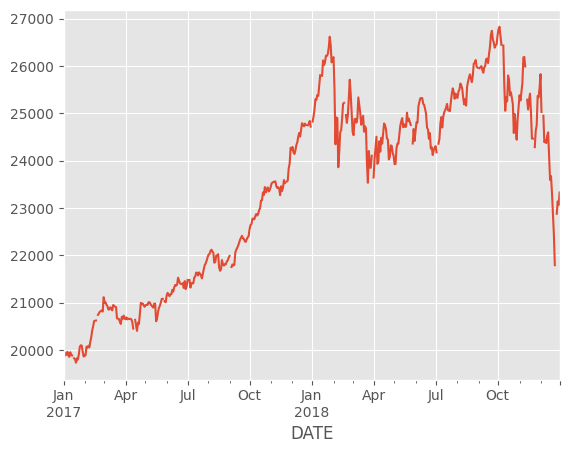

In [ ]:
ax = dj_df.loc['2017':'2018'].plot(legend=False)
ax.set_xlabel = 'Down Jones'
ax.set_ylabel = 'Date'

### Airline Passengers

https://github.com/DataForScience/Timeseries/blob/master/data/international-airline-passengers.csv

In [ ]:
df_air_pass = pd.read_csv('/content/international-airline-passengers.csv', sep=';', parse_dates=['Month'])
df_air_pass.set_index('Month', inplace=True)
df_air_pass

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Text(0.5, 0, 'Date')

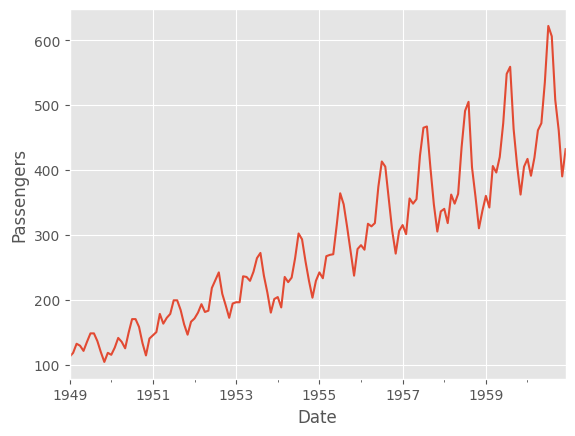

In [ ]:
ax = df_air_pass.plot(legend=False)
ax.set_ylabel('Passengers')
ax.set_xlabel('Date')

# Chapter 3 - Trend Behaviour

### Non-stationarity

In [ ]:
x =  np.linspace(0, np.pi*10, 360)
y = np.sin(x)

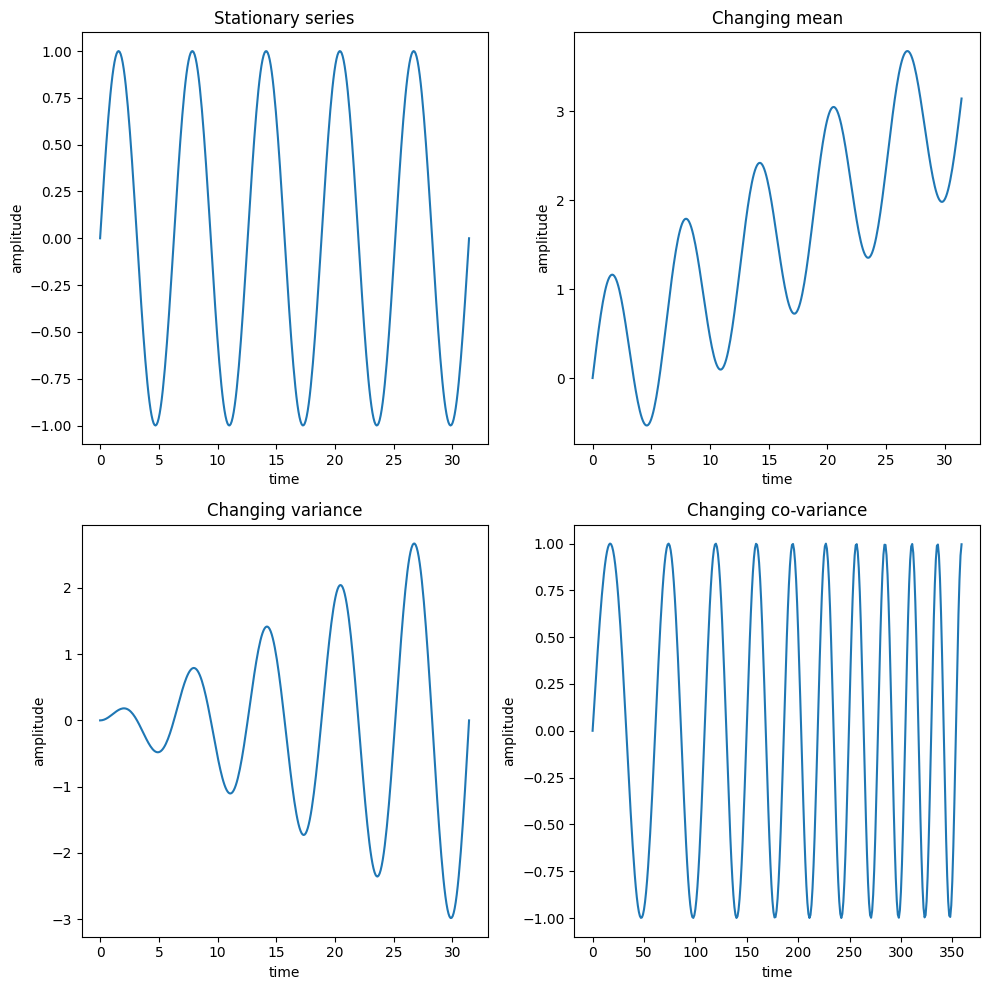

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0][0].plot(x,y)
axs[0][0].set_title('Stationary series')
axs[0][0].set_xlabel('time')
axs[0][0].set_ylabel('amplitude')

axs[0][1].plot(x,y+x/10)
axs[0][1].set_title('Changing mean')
axs[0][1].set_xlabel('time')
axs[0][1].set_ylabel('amplitude')

axs[1][0].plot(x,y*x/10)
axs[1][0].set_title('Changing variance')
axs[1][0].set_xlabel('time')
axs[1][0].set_ylabel('amplitude')

axs[1][1].plot(np.sin(x+x*x/30))
axs[1][1].set_title('Changing co-variance')
axs[1][1].set_xlabel('time')
axs[1][1].set_ylabel('amplitude')

plt.tight_layout()

#### Trends

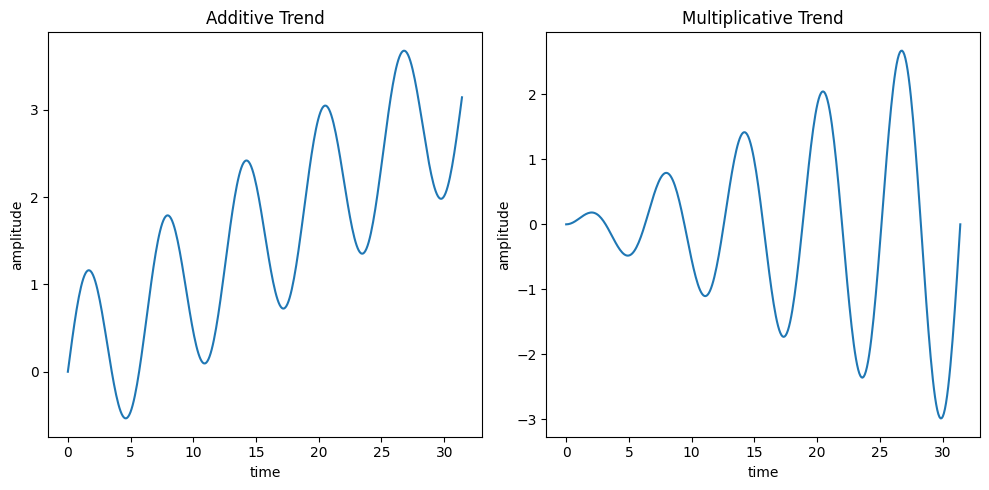

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(10,5), squeeze=False)

axis[0][0].plot(x,y+x/10)
axis[0][0].set_title('Additive Trend')
axis[0][0].set_xlabel('time')
axis[0][0].set_ylabel('amplitude')

# Amplitudes variation are increasing in time
axis[0][1].plot(x,y*x/10)
axis[0][1].set_title('Multiplicative Trend')
axis[0][1].set_xlabel('time')
axis[0][1].set_ylabel('amplitude')

plt.tight_layout()

Text(0.5, 0, 'Date')

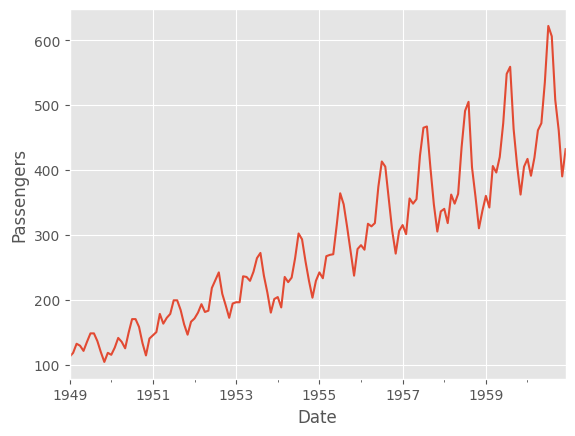

In [ ]:
#Example:

df_air_pass = pd.read_csv('/content/international-airline-passengers.csv', sep=';', parse_dates=['Month'])
df_air_pass.set_index('Month', inplace=True)
ax = df_air_pass.plot(legend=False)
ax.set_ylabel('Passengers')
ax.set_xlabel('Date')

Text(0, 0.5, '$\\langle Passengers\\rangle$')

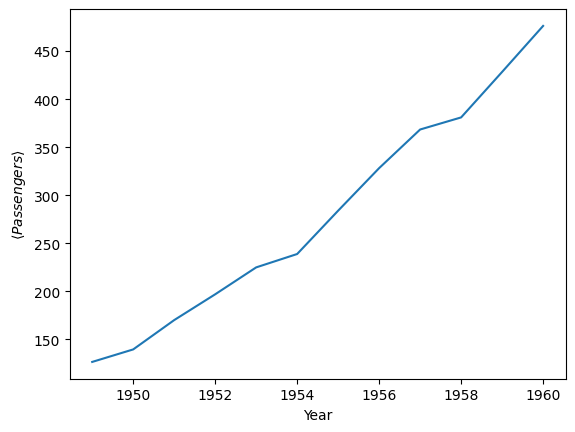

In [ ]:
# It indicates that there are a growing mean value (one of the kinds of non-stationary time series)

df_air_pass['Year'] = df_air_pass.index.year
ax=df_air_pass[['Year', 'Passengers']].groupby('Year').mean().plot(legend=False) # mean by year
ax.set_ylabel(r'$\langle Passengers\rangle$')

We can also calculate the range (max-min) of the values for each year and plot them as a s function of the year.

It shows clearlly that there is a multiplicative trend because we can se that the amplitude is changing (variance is increasing over time).

,Passengers,Max,Min,Range
Year,,,,
1949,126.666667,148,104,44
1950,139.666667,170,114,56
1951,170.166667,199,145,54
1952,197.000000,242,171,71
1953,225.000000,272,180,92
1954,238.916667,302,188,114
1955,284.000000,364,233,131
1956,328.250000,413,271,142
1957,368.416667,467,301,166


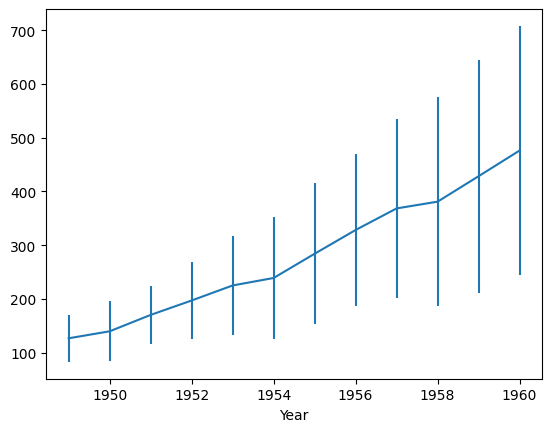

In [ ]:
stats = df_air_pass[['Year', 'Passengers']].groupby('Year').mean()
stats['Max'] = df_air_pass[['Year', 'Passengers']].groupby('Year').max()
stats['Min'] = df_air_pass[['Year', 'Passengers']].groupby('Year').min()
stats['Range'] = stats['Max'] - stats['Min']

ax = stats.plot(y='Passengers', yerr='Range', legend=False) # yerr: add error bars
ax.set_label('Passengers')

stats

#### Decompositon - Detrending

In [ ]:
def running_average(x, order):
	"""Runs over the entire dataset, one step a time, and calculates
	the average value within each window.
  :param DataFrame x: data
  :param int order: width of the window. For instance, 12 months"""

	index = x.index # months
	values = x.values # passangers counts

  # first window
	current = x.values[:order].sum() # values for the first window, going from 0 to order-1

	running = []

  # sliding the window
  # the window slides one month at time. When it slides, it replaces the first value of the window
  # with the next one (in order to do the make the window move) and take the average.
	for i in range(order, x.shape[0]):
		current += values[i] # add the next window value
		current -= values[i-order] # remove the first window value
		running.append(current/order) # average value of the new window

	run = x.iloc[order:].copy()
	run = np.array(running)

	final = x.copy()[order:]
	final.iloc[:, 0] = run

	return final

In [ ]:
trend = running_average(df_air_pass, 12)
trend

,Passengers
Month,
1950-01-01,126.916667
1950-02-01,127.583333
1950-03-01,128.333333
1950-04-01,128.833333
1950-05-01,129.166667
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


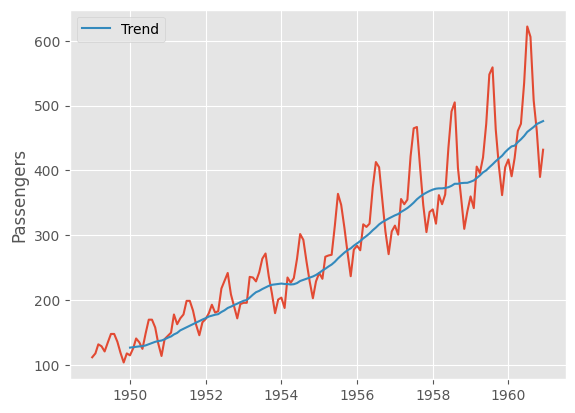

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(df_air_pass.index, df_air_pass['Passengers'])
ax.set_label('Date')
ax.set_ylabel('Passengers')
ax.plot(df_air_pass.index[12:], trend, label='Trend')
ax.legend()

It is possible to see a clearly increasing trend!

Below, we will remove the trend of the data:

In [ ]:
detrended = df_air_pass.iloc[12:].div(trend)

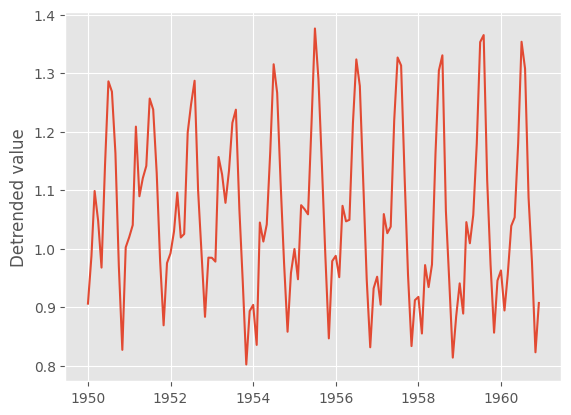

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_label('Date')
ax.set_ylabel('Detrended value')
ax.plot(df_air_pass.index[12:], detrended)

#### Decompositon - Seasonality

In [ ]:
def plot_seasons(detrended, order, plot_mean=True):
	colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
	N = len(detrended)
	data = np.array([detrended[i::order].values for i in range(order)])
	means = np.mean(data, axis=1)
	medians = np.median(data, axis=1)

	counts = [0]
	counts.extend([len(data[i]) for i in range(order)])
	counts = np.cumsum(counts)

	for i in range(order):
		values = data[i, :]
		npoints = len(values)

		plt.plot(range(counts[i], counts[i+1]), values, c=colors[0])
		plt.plot(range(counts[i], counts[i+1]), np.ones(npoints)*means[i], c=colors[1])
		plt.plot(range(counts[i], counts[i+1]), np.ones(npoints)*medians[i], c=colors[2])

	plt.legend(['data', 'mean', 'median'])
	plt.xlabel('season')
	plt.ylabel('values')


	if plot_mean:
		ticks = (counts[:-1]+counts[1]/2)
		plt.xticks(ticks, np.arange(order))
		plt.plot(ticks, means, c=colors[3])

	return means

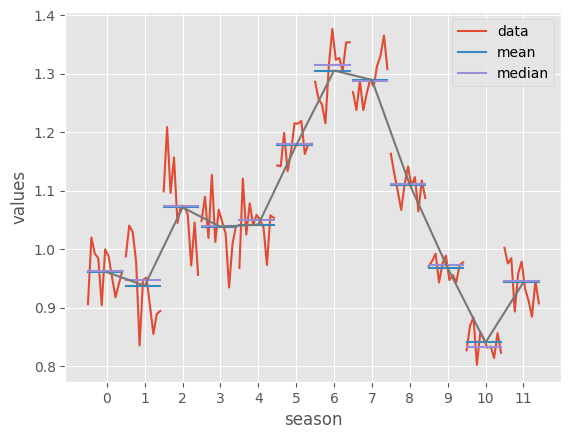

In [ ]:
# plot the seasonal pattern
means = plot_seasons(detrended, 12)

#### Decomposition - Trend, Seasonality and Residuals

In [ ]:
def decomposition(data, order):
	values = data.values.flatten()
	trend = running_average(data, order)
	detrended = data[order:].div(trend) # removes trend

	season = [detrended[i::order].mean() for i in range(order)]
	seasonality =  np.array(season*(detrended.shape[0]//order+1))[:detrended.shape[0]]
	residuals = data[order:].div(trend*seasonality) # removes trend and seasonality from the original data (multiplicative decomposition)
  # for additive decomposition, you should add and substract, instead of multiply and divide

	return values, trend, seasonality, residuals

In [ ]:
values, trend, seasonality, residuals = decomposition(df_air_pass, 12)

In [ ]:
def plot_decomposition(values, trend, seasonality, residuals):
	fig, axs = plt.subplots(4, 1, figsize=(10,10), sharex=True)
	index = df_air_pass.index
	axs[0].plot(index, values)
	axs[0].set_title('Original Data')

	axs[1].plot(index[12:], trend)
	axs[1].set_title('Trend')

	axs[2].plot(index[12:], detrended)
	axs[2].set_title('Seasonality')

	axs[3].plot(index[12:], residuals)
	axs[3].set_title('Residuals')

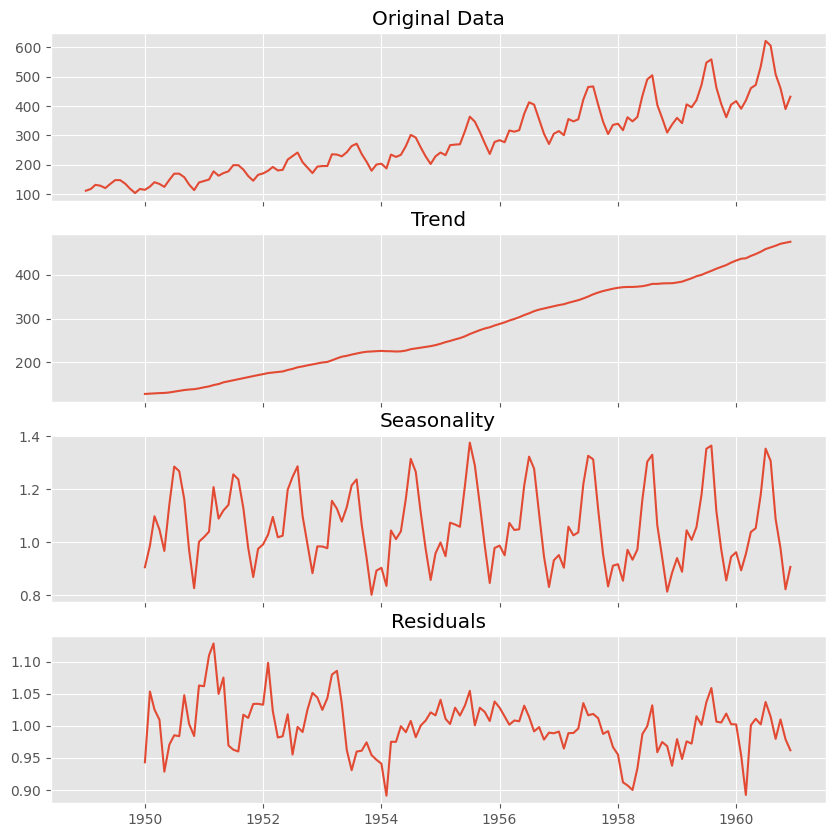

In [ ]:
plot_decomposition(values, trend, seasonality, residuals)

# Chapter 4 - Transforming time series data

In [ ]:
import scipy
from scipy import stats

In [ ]:
dj_df.head()

,DJIA
DATE,
2009-10-12,9885.80
2009-10-13,9871.06
2009-10-14,10015.86
2009-10-15,10062.94
2009-10-16,9995.91


Text(0.5, 0, 'Date')

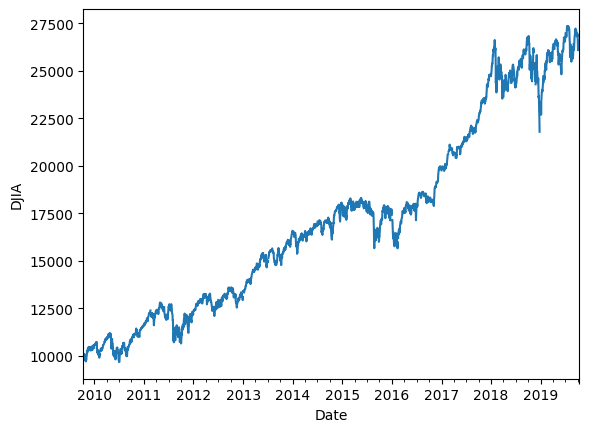

In [ ]:
dj_df.plot(legend=False)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

## Lagged Values

The pandas method shift(lag) allows to calc lagged values for any series.

For positive values of lag, it pushes current values into the future.

For negative values of lag, it moves to the past.

Text(0.5, 0, 'Date')

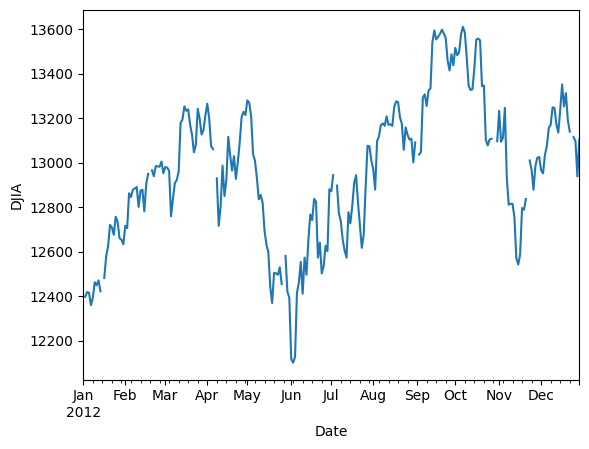

In [ ]:
DJIA_2012 = dj_df[dj_df.index.year == 2012].copy()
DJIA_2012.plot(legend=False)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

In [ ]:
DJIA_2012['forward 1W'] = DJIA_2012['DJIA'].shift(7) # add Nan for values that does not have previous ones
DJIA_2012['backward 1W'] = DJIA_2012['DJIA'].shift(-7) # the first element will be the 8a element from the original data, and so on. As the opposite, the last rows wont  be previous an will be Nan
DJIA_2012.iloc[:9]

,DJIA,forward 1W,backward 1W
DATE,,,
2012-01-02,NaN,NaN,12449.45
2012-01-03,12397.38,NaN,12471.02
2012-01-04,12418.42,NaN,12422.06
2012-01-05,12415.70,NaN,NaN
2012-01-06,12359.92,NaN,12482.07
2012-01-09,12392.69,NaN,12578.95
2012-01-10,12462.47,NaN,12623.98
2012-01-11,12449.45,NaN,12720.48
2012-01-12,12471.02,12397.38,12708.82


In [ ]:
DJIA_2012.tail()

,DJIA,forward 1W,backward 1W
DATE,,,
2012-12-25,NaN,13135.01,NaN
2012-12-26,13114.59,13235.39,NaN
2012-12-27,13096.31,13350.96,NaN
2012-12-28,12938.11,13251.97,NaN
2012-12-31,13104.14,13311.72,NaN


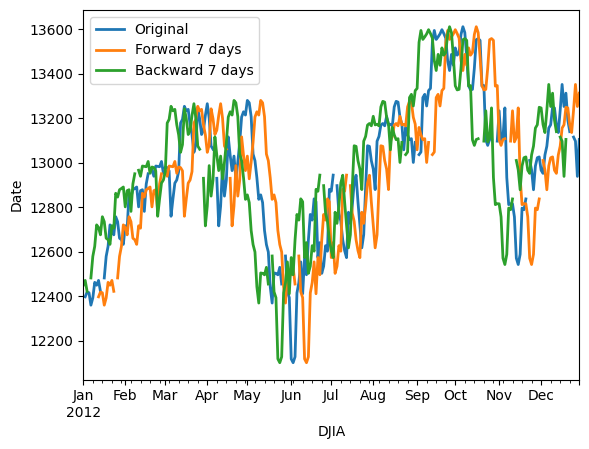

In [ ]:
ax = DJIA_2012.plot(lw=2)
ax.set_xlabel('DJIA')
ax.set_ylabel('Date')
ax.legend(['Original', 'Forward 7 days', 'Backward 7 days'])

One way of removing the trend of a dataset is to differentiate it. Pandas has the diff() function for it.

In [ ]:
DJIA_2012['diff'] = DJIA_2012['DJIA'].diff(1)
DJIA_2012

,DJIA,forward 1W,backward 1W,diff
DATE,,,,
2012-01-02,NaN,NaN,12449.45,NaN
2012-01-03,12397.38,NaN,12471.02,NaN
2012-01-04,12418.42,NaN,12422.06,21.04
2012-01-05,12415.70,NaN,NaN,-2.72
2012-01-06,12359.92,NaN,12482.07,-55.78
...,...,...,...,...
2012-12-25,NaN,13135.01,NaN,NaN
2012-12-26,13114.59,13235.39,NaN,NaN
2012-12-27,13096.31,13350.96,NaN,-18.28


In [ ]:
def differentiate(values, d=1, fill=False):
  x = values.diff(1).copy()

  # Replace the first Nan value with the first value of the series
  if fill:
    x.loc[0] = values.iloc[0]
  if d == 1:
    return x
  else:
    return differentiate(x, d-1)

def integrate(values, d=1):
  'The opposite function'

  x = values.cumsum().copy()

  if d == 1:
    return x
  else:
    return integrate(x, d-1)

In [ ]:
values = DJIA_2012[['DJIA']]
differences = differentiate(values, fill=True)

Text(0, 0.5, 'Differences')

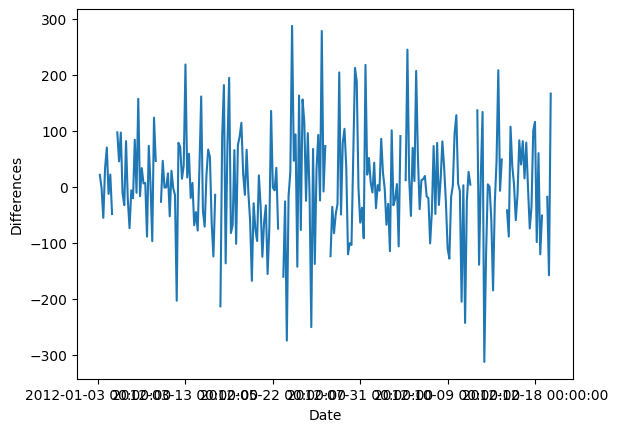

In [ ]:
# Notice that after remove the trend, it looks more stationary
ax = differences.iloc[1:].plot(legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Differences')

In [ ]:
# reintegrate
rebuild = integrate(differences)

Another example is the Sun Activity.

In the example below, It is possible to see how the overlay of the peaks each 11 year, what shows the cyclical phenomenon

<ipython-input-55-4ef6906edad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_df_activity['forward'] = sun_df_activity['SUNACTIVITY'].shift(11)
<ipython-input-55-4ef6906edad7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_df_activity['backward'] = sun_df_activity['SUNACTIVITY'].shift(-11)


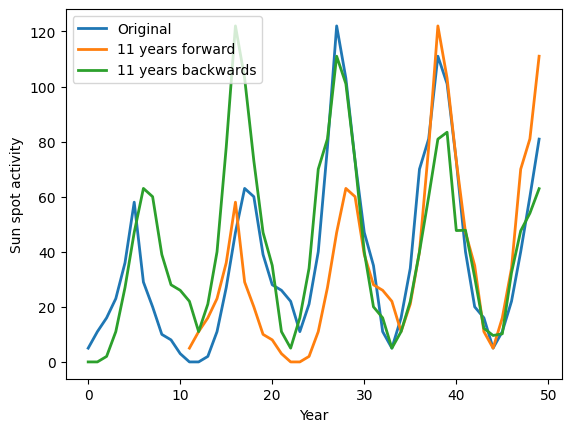

In [ ]:
sun_df_activity = sun_df[['SUNACTIVITY']]
sun_df_activity['forward'] = sun_df_activity['SUNACTIVITY'].shift(11)
sun_df_activity['backward'] = sun_df_activity['SUNACTIVITY'].shift(-11)

ax = sun_df_activity.iloc[:50].plot(lw=2)
ax.set_ylabel('Sun spot activity')
ax.set_xlabel('Year')
ax.legend(['Original', '11 years forward', '11 years backwards'])

## Missing

Approaches to input missing values

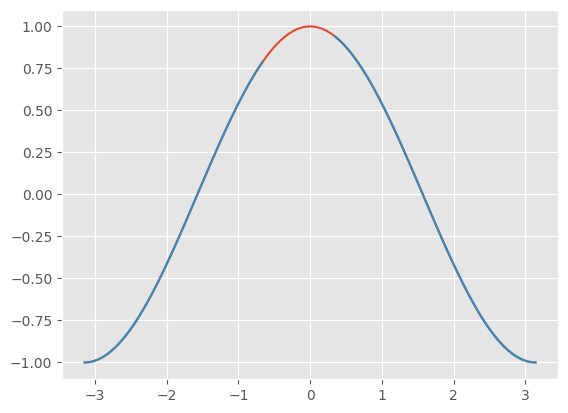

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
y_missing = y.copy()
y_missing[40:55] = np.nan

plt.plot(x, y)
plt.plot(x, y_missing)

Strategies for imputation

https://en.wikipedia.org/wiki/imputation_(statistics)

In [ ]:
def backward_fill(y):
  '''Use the last found value. Cannot be used for missing data at the beginning'''
  y0 = y.copy()
  N = len(y0)

  current = None
  for i in range(1, N):
    if np.isnan(y0[i]):
      y0[i] = current
    else:
      current = y0[i]

  return y0

In [ ]:
def forward_fill(y):
  '''Use the next found value. Cannot be used for missing data at the end'''
  y0 = y.copy()
  N = len(y0)

  current = None
  for i in range(N-1, 0, -1):
    if np.isnan(y0[i]):
      y0[i] = current
    else:
      current = y0[i]

  return y0

In [ ]:
slope = (1+5)/2
np.arange(1, 5+1)*slope

array([ 3.,  6.,  9., 12., 15.])

In [ ]:
def interpolate(y):
  '''Interpolate between previous and next connecting them with a straight line'''
  y0 = y.copy()
  N = len(y0)

  pos = 0
  while pos < N:
    if np.isnan(y0[pos]):
      count = 0
      while np.isnan(y0[pos+count]):
        count += 1
      current = y0[pos-1]
      future = y[pos+count]
      slope = (future-current)/count
      y0[pos:pos+count] = current + np.arange(1, count+1)*slope
      pos += count
    else:
      pos += 1
  return y0



In [ ]:
y_bfill = backward_fill(y_missing)
y_ffill = forward_fill(y_missing)
y_inter = interpolate(y_missing)

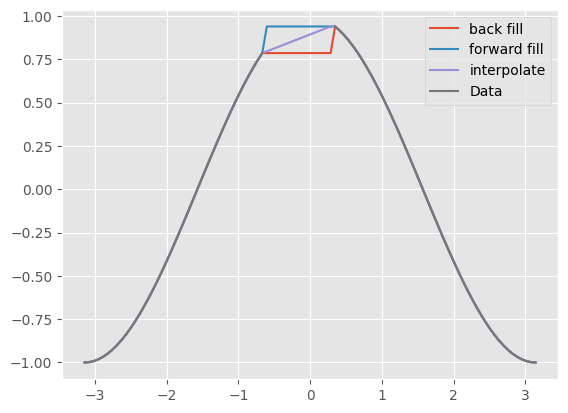

In [ ]:
plt.plot(x, y_bfill, label='back fill')
plt.plot(x, y_ffill, label='forward fill')
plt.plot(x, y_inter, label='interpolate')
plt.plot(x, y_missing, label='Data')
plt.legend()

## Resampling

### Aggregation

In [ ]:
mapping = dj_df.index.year
values = dj_df['DJIA'].values

In [ ]:
def groupBy(values, mapping, func=None):
  '''change the frequency from bottom to up. For instance: from days to years
  func can be any function that receives and array and returns an unique value or an array
  '''
  agg = {}
  pos = {}

  for i in range(values.shape[0]):
    key = mapping[i]

    if key not in agg:
      agg[key] = []

    pos[key] = i
    if not np.isnan(values[i]):
      agg[key].append(values[i])
    order = sorted(agg.keys())

    if func is not None:
      for key in agg:
        agg[key] =  func(np.array(agg[key]).astype('float'))

    return agg, pos

In [ ]:
agg, pos = groupBy(values, mapping, np.mean)
agg

{2009: 9885.8}

In [ ]:
aggregated = []

for key in pos:
  aggregated.append([pos[key], agg[key]])

aggregated = np.array(aggregated)
aggregated

array([[   0. , 9885.8]])

Text(0.5, 0, 'Date')

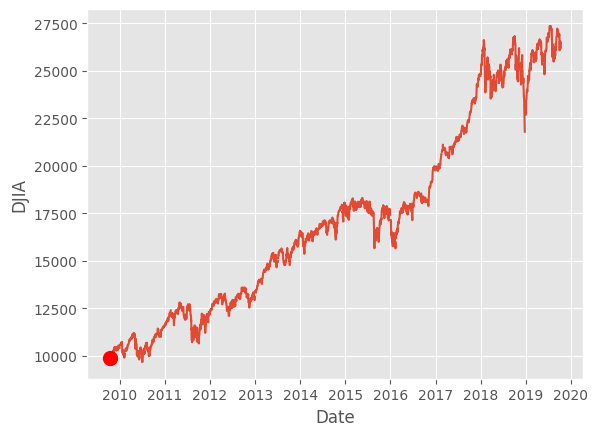

In [ ]:
plt.plot(dj_df.index, dj_df['DJIA'])
ax = plt.gca()
ax.plot(dj_df.index[aggregated.T[0].astype('int')], aggregated.T[1])
ax.plot(dj_df.index[aggregated.T[0].astype('int')], aggregated.T[1], 'ro', markersize=10)
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

### Jackniffe estimators



In [ ]:
def jacknife(x, func, variance=False):
  N =  len(x)
  pos = np.arange(N)
  values = [func(x[pos != i]) for i in pos]
  jack = np.sum(values)/N

  if variance:
    values = [np.power(func(x[pos != i]) - jack, 2.0) for i in pos] # (std - jack)²
    var = (N-1)/(N * np.sum(values))
    return jack, var
  else:
    return jack

In [ ]:
x =  np.random.normal(0, 2, 100)
print(x.std())
jacknife(x, np.std, True) # returns jacniffe and variance (error)

2.221699770540248


(2.221533342278945, 41.973590261949646)

### Bootstrapping

In [ ]:
def bootstrapping(x, n_samples, func=np.mean):
  y = x.copy()
  N =  len(y)
  population = []
  for i in range(n_samples):
    population.append(func(np.random.choice(y, N, replace=True)))
  return np.array(population)

In [ ]:
def histogram(values, n_bins=100):
  xmax = values.max()
  xmin = values.min()
  delta = (xmax - xmin)/n_bins
  counts =  np.zeros(n_bins+1, dtype='int')
  for value in values:
    val_bin = np.around((value-xmin)/delta).astype('int')
    counts[val_bin] += 1.0

  bins = xmin+delta*np.arange(n_bins+1)
  print(bins, delta)
  return bins, counts/values.shape[0]

In [ ]:
x = np.random.normal(0, 2, 100)
print(x.mean(), x.std())

0.14376183506851134 2.0759292012406823


In [ ]:
boot = bootstrapping(x, 1000)
bins, counts = histogram(boot)

[-0.48218202 -0.4696254  -0.45706878 -0.44451215 -0.43195553 -0.41939891
 -0.40684229 -0.39428567 -0.38172904 -0.36917242 -0.3566158  -0.34405918
 -0.33150255 -0.31894593 -0.30638931 -0.29383269 -0.28127607 -0.26871944
 -0.25616282 -0.2436062  -0.23104958 -0.21849295 -0.20593633 -0.19337971
 -0.18082309 -0.16826647 -0.15570984 -0.14315322 -0.1305966  -0.11803998
 -0.10548335 -0.09292673 -0.08037011 -0.06781349 -0.05525687 -0.04270024
 -0.03014362 -0.017587   -0.00503038  0.00752625  0.02008287  0.03263949
  0.04519611  0.05775273  0.07030936  0.08286598  0.0954226   0.10797922
  0.12053585  0.13309247  0.14564909  0.15820571  0.17076233  0.18331896
  0.19587558  0.2084322   0.22098882  0.23354545  0.24610207  0.25865869
  0.27121531  0.28377193  0.29632856  0.30888518  0.3214418   0.33399842
  0.34655505  0.35911167  0.37166829  0.38422491  0.39678153  0.40933816
  0.42189478  0.4344514   0.44700802  0.45956465  0.47212127  0.48467789
  0.49723451  0.50979113  0.52234776  0.53490438  0

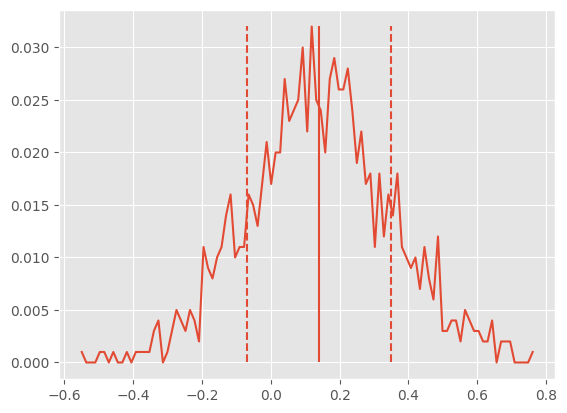

In [ ]:
plt.plot(bins, counts)
plt.vlines(x=boot.mean(), ymin=0, ymax=counts.max(), label='mean')
plt.vlines(x=boot.mean()+boot.std(), ymin=0, ymax=counts.max(), label='std', linestyle='--') # mean + 1 std
plt.vlines(x=boot.mean()-boot.std(), ymin=0, ymax=counts.max(), label='std', linestyle='--') # mean - 1 std


# Chapter 5 - Running values measures

## Windowing

In [ ]:
def rolling(values, window_size):
  npoints = values.shape[0] # quantity of elements
  running = []
  for i in range(npoints - window_size + 1):
    running.append(values[i : i + window_size])
  return np.array(running)

In [ ]:
values = np.arange(11)
values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
rolling(values, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])

In [ ]:
rolling(values, 6).mean(axis=1) # row mean

array([2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

Pandas already comes with a rolling function:

In [ ]:
dj_df_2010 = dj_df[dj_df.index.year ==  2010].copy().dropna()
dj_df_2010['mean6'] = dj_df_2010['DJIA'].rolling(6).mean() # 6 days
dj_df_2010['mean30'] = dj_df_2010['DJIA'].rolling(30).mean() # 30 days
dj_df_2010['mean60'] = dj_df_2010['DJIA'].rolling(60).mean() # 60 days
#dj_df_2010['comulative_sum'] = dj_df_2010['DJIA'].rolling(window='3D').sum() # 30 days

In [ ]:
dj_df_2010[dj_df_2010.index.month ==  1]

,DJIA,mean6,mean30,mean60
DATE,,,,
2010-01-04,10583.96,NaN,NaN,NaN
2010-01-05,10572.02,NaN,NaN,NaN
2010-01-06,10573.68,NaN,NaN,NaN
2010-01-07,10606.86,NaN,NaN,NaN
2010-01-08,10618.19,NaN,NaN,NaN
2010-01-11,10663.99,10603.116667,NaN,NaN
2010-01-12,10627.26,10610.333333,NaN,NaN
2010-01-13,10680.77,10628.458333,NaN,NaN
2010-01-14,10710.55,10651.270000,NaN,NaN


In [ ]:
dj_df_2010[dj_df_2010.index.month ==  2]

,DJIA,mean6,mean30,mean60
DATE,,,,
2010-02-01,10185.53,10166.771667,NaN,NaN
2010-02-02,10296.85,10183.436667,NaN,NaN
2010-02-03,10270.55,10196.146667,NaN,NaN
2010-02-04,10002.18,10157.150000,NaN,NaN
2010-02-05,10012.23,10139.111667,NaN,NaN
2010-02-08,9908.39,10112.621667,NaN,NaN
2010-02-09,10058.64,10091.473333,NaN,NaN
2010-02-10,10038.38,10048.395000,NaN,NaN
2010-02-11,10144.19,10027.335000,NaN,NaN


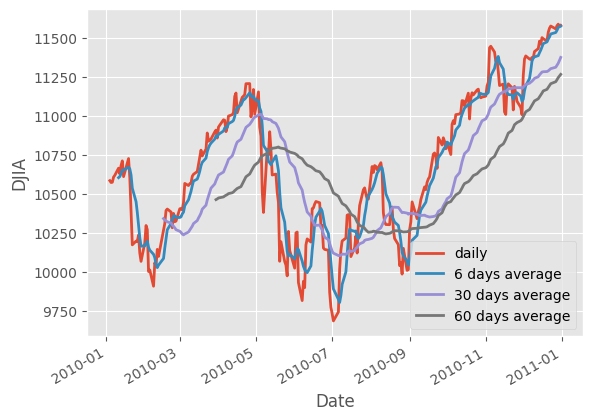

In [ ]:
dj_df_2010.plot(lw=2)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')
ax.legend(['daily', '6 days average', '30 days average', '60 days average'])

Adding envelope

In [ ]:
dj_df_2010['max30'] = dj_df_2010['DJIA'].rolling(30).max()
dj_df_2010['min30'] = dj_df_2010['DJIA'].rolling(30).min()

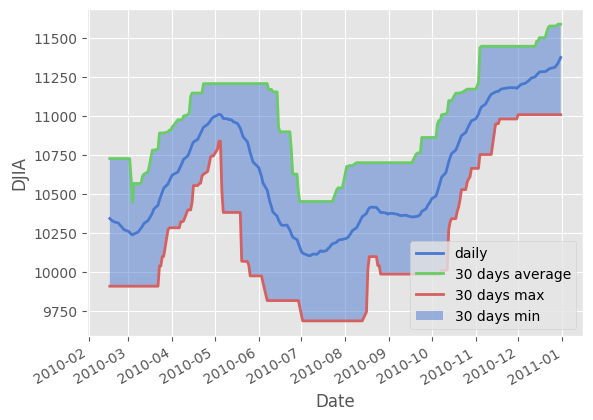

In [ ]:
ax = dj_df_2010[['mean30', 'max30', 'min30']].plot(lw=2)
ax.fill_between(x=dj_df_2010.index,
                y1=dj_df_2010['max30'].values,
                y2=dj_df_2010['min30'].values,
                alpha=0.5)
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')
ax.legend(['daily', '30 days average', '30 days max', '30 days min'], loc='lower right')

## Bolinger Bands

Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price.

In [ ]:
N = 20 # Moving average window size
K = 2 # Number of standard deviation
# the envelope size is average +- k*standard deviation

dj_df_2010['BBMA'] = dj_df_2010['DJIA'].rolling(30).mean()
dj_df_2010['BBUp'] = dj_df_2010['BBMA'] + K*dj_df_2010['DJIA'].rolling(30).std()
dj_df_2010['BBDown'] = dj_df_2010['BBMA'] - K*dj_df_2010['DJIA'].rolling(30).std()

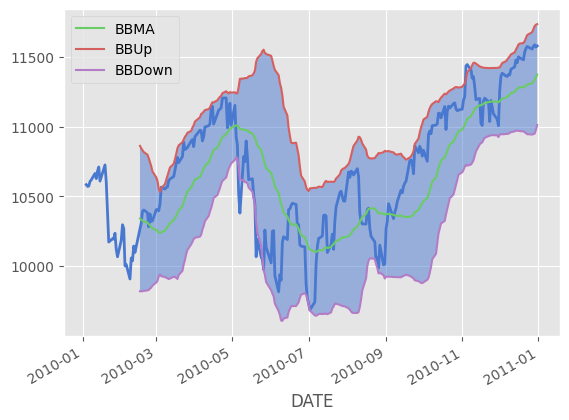

In [ ]:
ax = dj_df_2010.plot(y=['DJIA'], lw=2, legend=False)
ax.fill_between(x=dj_df_2010.index,
                y1=dj_df_2010['BBUp'].values,
                y2=dj_df_2010['BBDown'].values,
                alpha=0.5)
dj_df_2010.plot(y=['BBMA', 'BBUp', 'BBDown'], lw=1.5, ax=ax)
ax.set_label('DJIA')

In [ ]:
crosses = dj_df_2010[dj_df_2010['DJIA'] < dj_df_2010['BBDown']][['DJIA', 'BBDown']]
crosses

,DJIA,BBDown
DATE,,
2010-05-06,10520.32,10711.231890
2010-05-07,10380.43,10621.401013
2010-05-20,10068.01,10318.288519
2010-05-21,10193.39,10239.227777
2010-05-24,10066.57,10146.217712
2010-05-25,10043.75,10059.936789


Text(0, 0.5, 'DJIA')

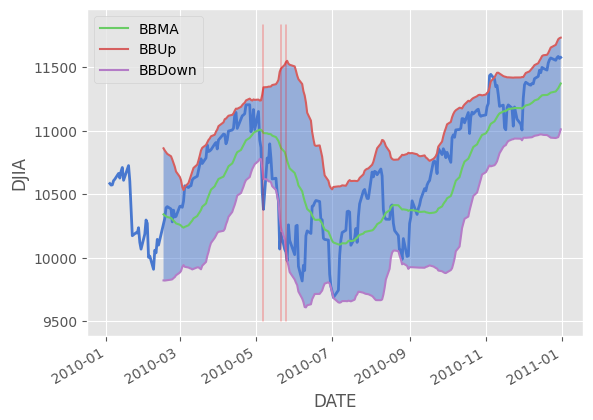

In [ ]:
# place a vertical red line when DJIA crossed the bands
ax = dj_df_2010.plot(y=['DJIA'], lw=2, legend=False)
dj_df_2010.plot(y=['BBMA', 'BBUp', 'BBDown'], lw=1.5, ax=ax)
ax.fill_between(x=dj_df_2010.index,
                y1=dj_df_2010['BBUp'].values,
                y2=dj_df_2010['BBDown'].values,
                alpha=0.5)
ymin, ymax = ax.get_ylim()
ax.vlines(x=crosses.index, ymax=ymax, ymin=ymin, colors='r', lw=0.5, alpha=0.3)
ax.set_ylabel('DJIA')


## Exponential Running Averages

Weight each point that contributes to a moving average in such a way that the older the point the more strongly it gets discounted.

In [ ]:
def EWMA(values, alpha=0.01):
  N = len(values)
  s = [values[0]]
  for i in range(1, N):
    s.append(alpha*values[i] + (1-alpha)*s[-1]) # alpha*current_value + (1-alpha)*last_value on the list
  return np.array(s)

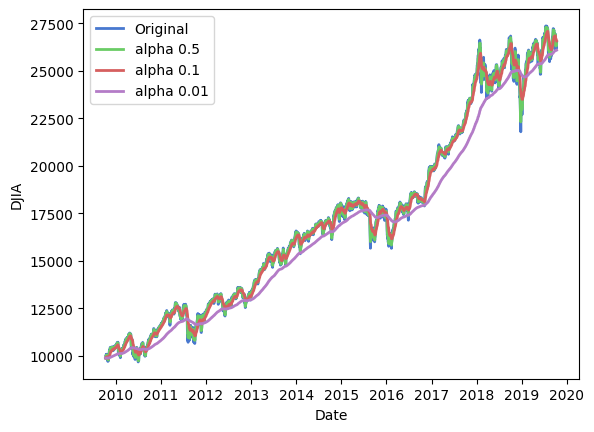

In [ ]:
df = dj_df.dropna()
ax=plt.plot(df.index,
        df['DJIA'],
        lw=2)

plt.plot(df.index,
        EWMA(df['DJIA'], 0.5),
        label=r'$\alpha=0.5$',
        lw=2)

plt.plot(df.index,
        EWMA(df['DJIA'], 0.1),
        label=r'$\alpha=0.1$',
        lw=2)

plt.plot(df.index,
        EWMA(df['DJIA'], 0.01),
        label=r'$\alpha=0.01$',
        lw=2)

plt.ylabel('DJIA')
plt.xlabel('Date')
plt.legend(['Original', 'alpha 0.5', 'alpha 0.1', 'alpha 0.01'])

Pandas already comes with a ewm function that has some moving metrics options:
- mean()
- var()
- std()
- corr()
- cov()

Text(0, 0.5, 'DJIA')

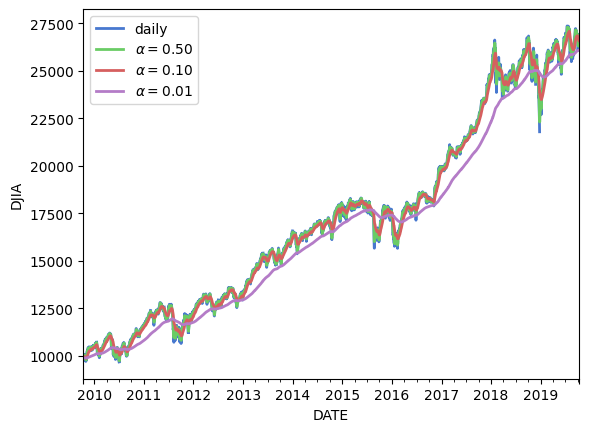

In [ ]:
dj_df['alpha50'] = dj_df['DJIA'].ewm(alpha=0.50, adjust=False).mean()
dj_df['alpha10'] = dj_df['DJIA'].ewm(alpha=0.10, adjust=False).mean()
dj_df['alpha1'] = dj_df['DJIA'].ewm(alpha=0.01, adjust=False).mean()

ax = dj_df.plot(y=['DJIA', 'alpha50', 'alpha10', 'alpha1'], lw=2)
ax.legend(['daily', r'$\alpha=0.50$', r'$\alpha=0.10$', r'$\alpha=0.01$'])
ax.set_ylabel('DJIA')

The difference between adjust=True and adjust=False is only noticeable in the first steps and are related about different assumptions about the first point in the series. After the first points it becomes constant (see below). Lowest alpha, high the difference.

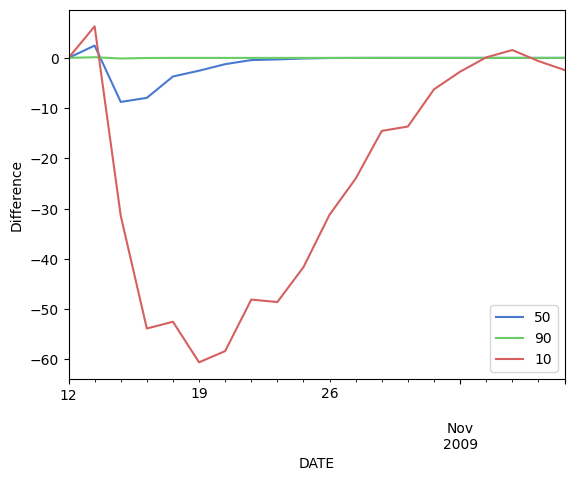

In [ ]:
ax = (df['DJIA'].ewm(alpha=0.50, adjust=False).mean() - df['DJIA'].ewm(alpha=0.50, adjust=True).mean())[:20].plot()
(df['DJIA'].ewm(alpha=0.90, adjust=False).mean() - df['DJIA'].ewm(alpha=0.90, adjust=True).mean())[:20].plot(ax=ax)
(df['DJIA'].ewm(alpha=0.10, adjust=False).mean() - df['DJIA'].ewm(alpha=0.10, adjust=True).mean())[:20].plot(ax=ax)

ax.set_ylabel('Difference')
ax.legend(['50', '90', '10'])

### Forecasting

EWMA can be used for forecasting. Is expected the value at t+1, or Zt+1, to be:

Zt+1 = alpha*Xt + (1-alpha)*Zt
Zt+1 = Zt + alpha(Xt - Zt)

Where:

Xt: current value at t
Zt: EWMA value at t

The forecasted value will be the EWMA value at t plus the scaled error between Xt and Zt.

In [ ]:
def ewma_forecast(value, ewm, alpha):
  return alpha*value+(1-alpha)*ewm

def forecast(values, alpha, N):
  ewma = values.ewm(alpha=alpha, adjust=False).mean()
  new_values = []
  for i in range(N, values.shape[0]):
    new_values.append(ewma_forecast(values.iloc[i-1], ewma.iloc[i-1], alpha))
  return new_values

In [ ]:
N = 100
df = dj_df[dj_df.index.year == 2010].dropna()
forecast03 = forecast(df['DJIA'], 0.3, N)
forecast05 = forecast(df['DJIA'], 0.5, N)
forecast07 = forecast(df['DJIA'], 0.7, N)

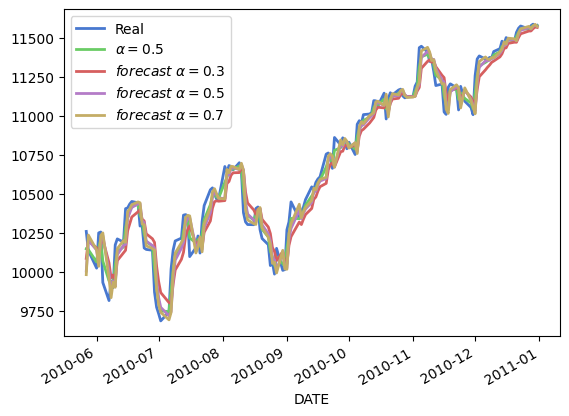

In [ ]:
ax = df.iloc[N:].plot(y='DJIA', lw=2)
df.iloc[N:].plot(y=['alpha50'], lw=2, ax=ax)
ax.plot(df.index[N:], forecast03, lw=2)
ax.plot(df.index[N:], forecast05, lw=2)
ax.plot(df.index[N:], forecast07, lw=2)

ax.legend(['Real',
           r'$\alpha=0.5$',
           r'$forecast~\alpha=0.3$',
           r'$forecast~\alpha=0.5$',
           r'$forecast~\alpha=0.7$'])

#### Choice of alpha

Start the choice the alpha by quantifying the difference between the original and the exponentially smoothed version.

In [ ]:
def RMSE(original_values, ewm_values):
  error = np.sqrt(np.power(original_values - ewm_values, 2.0).mean())
  return error

In [ ]:
err = []
alphas = np.linspace(0.01, 1, 100)
for alpha in alphas:
  err.append(RMSE(df['DJIA'].iloc[N:], forecast(df['DJIA'], alpha, N)))

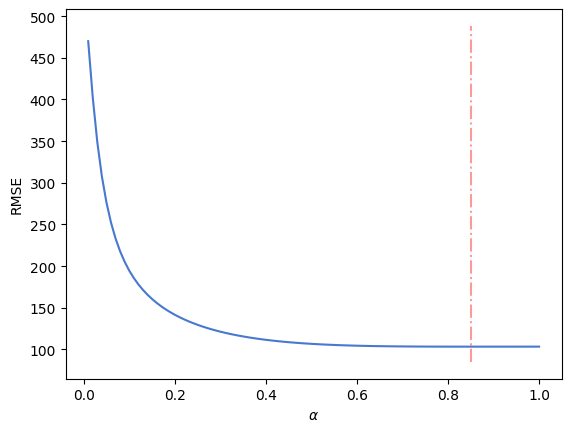

In [ ]:
plt.plot(alphas, err)
ax = plt.gca()
ax.set_ylabel('RMSE')
ax.set_xlabel(r'$\alpha$')

opt_alpha = alphas[np.argmin(err)] # argmin returns the indices of the minimum values along an axis.

ax.vlines(opt_alpha, *ax.get_ylim(), linestyle='-.', colors='r', alpha=0.4)

# Fourier Analysis

In [12]:
from numpy import fft
from mpl_toolkits.mplot3d import Axes3D

['Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (1.25.2)']

## Fake Data

In [14]:
t_max = 4 # signal duration
sample_freq = 250
N = t_max*sample_freq
t = np.linspace(0, t_max, N)
amp = np.array([1, .3, .1])
freq = np.array([1, 2, 10])

In [17]:
def build_signal(amp, freq, t):
  '''combine components into a signal'''
  total = np.zeros(len(t))
  components = []
  n_freq = len(freq)

  for i in range(n_freq):
    current = amp[i]*np.cos(2*np.pi*freq[i]*t)
    total += current
    components.append(current)
  return total, components

In [18]:
total, components = build_signal(amp, freq, t)

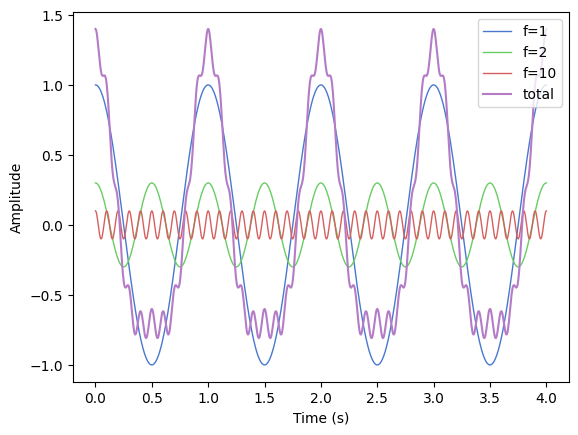

In [19]:
for i, comp in enumerate(components):
  plt.plot(t, comp, label='f=%g' % freq[i], lw=1)
plt.plot(t, total, label='total')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

(0.0, 12.0)

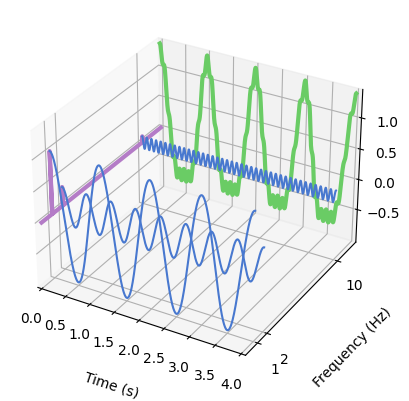

In [32]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #xyz
ax.set_xlabel('\n\nTime (s)', fontsize=10)
ax.set_ylabel('\n\nFrequency (Hz)', fontsize=10)
ax.set_zlabel('\n\nAmplitude (s)', fontsize=10)

linewidth = 1
n_freq = np.max(freq)+2
x = np.linspace(0,4,1000)
y = np.ones(x.size)

# Plot the total signal (x,y,z)
ax.plot(x, y*n_freq, total,  #x,y,z
        linewidth=3,
        color=colors[1])

# plot the amplitude
z = np.zeros(n_freq*100)
z[freq*100] = amp

ax.plot(np.zeros(n_freq*100), np.linspace(0, n_freq, n_freq*100), z, linewidth=3, color=colors[3])

y = np.ones(1000)
for i in range(0, len(components)):
  ax.plot(x, y*freq[i], components[i], linewidth=1.5, color=colors[0])

ax.set_yticks(freq)
ax.set_yticklabels(freq)
ax.set_xlim(0, t_max)
ax.set_ylim(0, n_freq)

# Decompose a signal

In [34]:
fft_values = fft.fft(total)

In [35]:
fft_values.dtype

dtype('complex128')

In [36]:
fft_real = 2.0/N *np.abs(fft_values[0:N//2])

In [37]:
# only a few values are significantily different from zero
np.where(fft_real>0.01)

(array([ 4,  8, 40]),)

In [39]:
freq_resolution = sample_freq/N
freq_resolution

0.25

In [43]:
freq_values = np.arange(N)*freq_resolution
freq_values[:10]

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25])

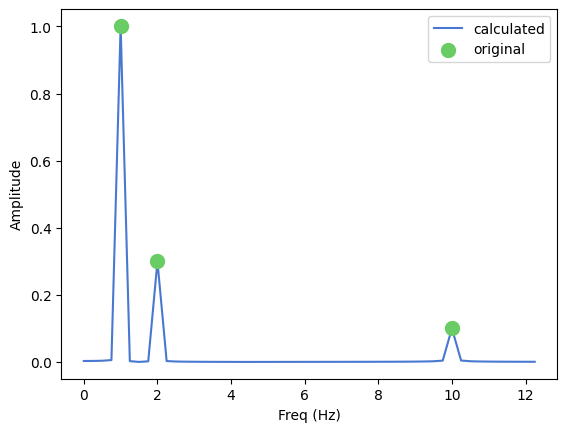

In [44]:
plt.plot(freq_values[:50], fft_real[:50], label='calculated')
plt.scatter(freq, amp, s=100, color=colors[1], zorder=3, label='original')
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.legend()

### FFT in the ILI dataset

In [46]:
ILI = pd.read_csv('CDC.csv')
ILI = pd.read_csv('CDC.csv')
ILI['date'] = ILI['Year'] + ILI['Week']/52

Text(0, 0.5, '% Mortality')

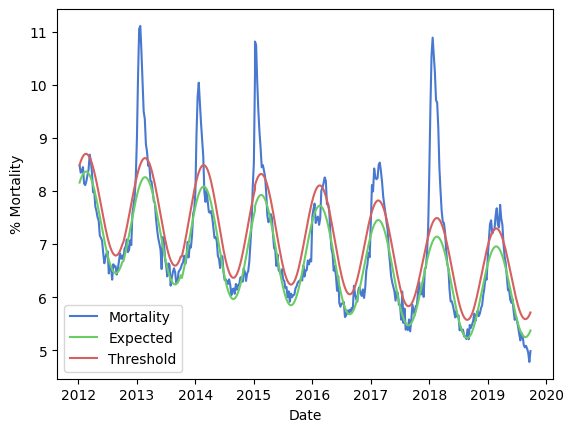

In [49]:
ILI.plot(x='date', y=['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold'])
ax = plt.gca()
ax.legend(['Mortality', 'Expected', 'Threshold'])
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')

In [50]:
# Calc the FFT

signal = ILI['Percent of Deaths Due to Pneumonia and Influenza'].values
date = ILI['date']
N = len(signal)
fft_values = fft.fft(signal)

In [51]:
# Calc the frequencies

freq_values = fft.fftfreq(N, 1/52) # 52 weeks per year

Text(0, 0.5, 'Amplitude')

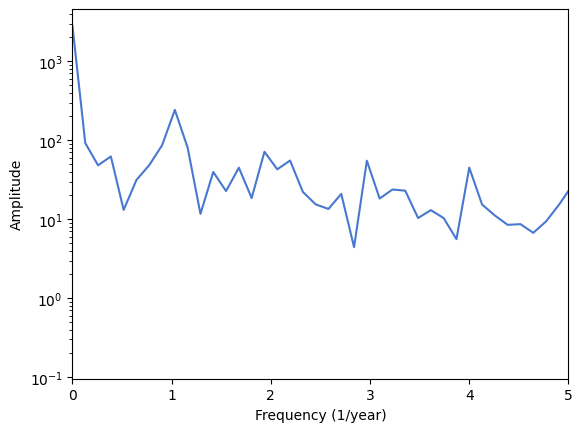

In [55]:
# Plot the amplitude as a function of frequency

fig, ax = plt.subplots(1)
ax.semilogy(freq_values[:N//2], np.abs(fft_values[:N//2]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('Amplitude')

# The plot says that there is an annual seasonality
# the amplitude is in log scale

It is also possible to remove some of the noise by filtering out some of the higher frequencies. To do this we can set frequencies > 2 years to zero.

In [56]:
filtered = fft_values.copy()
filtered[np.abs(freq_values) > 2] = 0

In [57]:
signal_filtered = np.real(fft.ifft(filtered))

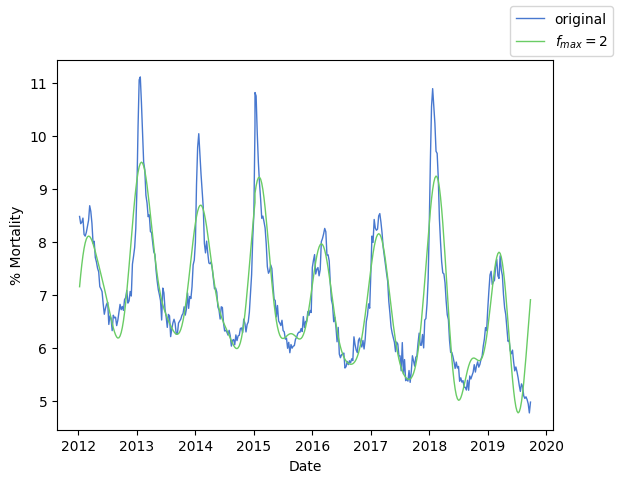

In [58]:
fig, ax = plt.subplots(1)
ax.plot(date, signal, lw=1, label='original')
ax.plot(date, signal_filtered, lw=1, label='$f_{max}=2$')
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')
fig.legend()

### Extrapolation

In [64]:
N = len(signal)

fft_values = fft.fft(signal)
freq_values = fft.fftfreq(N)

# extend the signal for N time steps
time = np.arange(0, 2*N)
rebuilt = np.zeros(2*N)

for i, value in enumerate(filtered):
  ampli = np.absolute(value)
  phase = np.angle(value)
  rebuilt += ampli * np.cos(2 * np.pi * freq_values[i] * time + phase)

rebuilt /= N

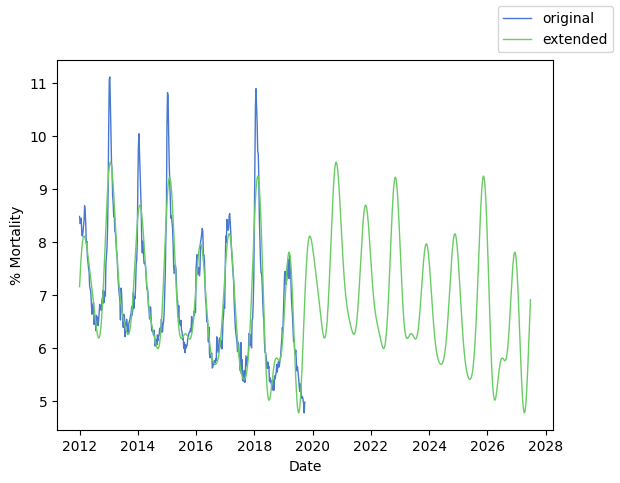

In [65]:
# compare original and extended
fig, ax = plt.subplots(1)
ax.plot(time[:N]/52+2012, signal, lw=1, label='original')
ax.plot(time/52+2012, rebuilt, lw=1, label='extended')
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')
fig.legend()